![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Tarea 3: Desestacionalidad series de tiempo y Regresión lineal simple**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde Vera

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
01 de septiembre de 2024


# Auto reload modules

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import scripts.index as index
import fs

In [34]:
MAIN_DIR = fs.open_fs("../../data/raw/HW03")
CSV_DIR = MAIN_DIR.getsyspath("T03.csv")

In [35]:
DIR = fs.open_fs(".")
NB_DIR = DIR.getsyspath("0.0-leng-HW03.ipynb")

# Extrae los encabezados y genera el índice
headings = index.extract_headings(NB_DIR)
toc = index.generate_toc(headings)

# Muestra el índice generado
# print(toc)

- [**Tarea 3: Desestacionalidad series de tiempo y Regresión lineal simple**](#**tarea-3:-desestacionalidad-series-de-tiempo-y-regresión-lineal-simple**)
  - [**Asignatura:** Econometría](#**asignatura:**-econometría)
  - [**Profesora:** Mae. Julieta María Sarralde Vera](#**profesora:**-mae.-julieta-maría-sarralde-vera)
- [Auto reload modules](#auto-reload-modules)
  - [Ejercicio](#ejercicio)
    - [1. Si establecemos como “regla de dedo” que una serie presenta poca variación si el coeficiente de variación es menor a 30%. En el caso de las exportaciones de aguacate ¿cuánto vale el coeficiente de variación? Exprese su resultado en porcentaje con dos decimales.](#1.-si-establecemos-como-“regla-de-dedo”-que-una-serie-presenta-poca-variación-si-el-coeficiente-de-variación-es-menor-a-30%.-en-el-caso-de-las-exportaciones-de-aguacate-¿cuánto-vale-el-coeficiente-de-variación?-exprese-su-resultado-en-porcentaje-con-dos-decimales.)
    - [2. Considerando las estadísticas descriptivas de la serie de tiempo de las exportaciones de aguacate ¿qué puede concluir? Incluya los gráficos relevantes para su análisis.](#2.-considerando-las-estadísticas-descriptivas-de-la-serie-de-tiempo-de-las-exportaciones-de-aguacate-¿qué-puede-concluir?-incluya-los-gráficos-relevantes-para-su-análisis.)
    - [3. Considerando un modelo de regresión de la serie original contra el tiempo, el valor del coeficiente de pendiente muestral es en miles de toneladas es:](#3.-considerando-un-modelo-de-regresión-de-la-serie-original-contra-el-tiempo,-el-valor-del-coeficiente-de-pendiente-muestral-es-en-miles-de-toneladas-es:)
    - [4. Elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si las exportaciones de aguacate han venido creciendo en el tiempo.](#4.-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-las-exportaciones-de-aguacate-han-venido-creciendo-en-el-tiempo.)
    - [5. Aplicando la técnica de desestacionalidad simple vista en clase, obtenga los índices estacionales e interprételos.](#5.-aplicando-la-técnica-de-desestacionalidad-simple-vista-en-clase,-obtenga-los-índices-estacionales-e-interprételos.)
    - [6. Obtenga la regresión lineal simple con los datos desestacionalizados y el tiempo y elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si la tendencia de las exportaciones de aguacate ha venido creciendo en el tiempo.](#6.-obtenga-la-regresión-lineal-simple-con-los-datos-desestacionalizados-y-el-tiempo-y-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-la-tendencia-de-las-exportaciones-de-aguacate-ha-venido-creciendo-en-el-tiempo.)
    - [7. Proporcione un intervalo al 95% de confianza para el valor de la tendencia de la serie de exportaciones de aguacate en el segundo bimestre del 2024.](#7.-proporcione-un-intervalo-al-95%-de-confianza-para-el-valor-de-la-tendencia-de-la-serie-de-exportaciones-de-aguacate-en-el-segundo-bimestre-del-2024.)
    - [8. Compare los resultados de los modelos de regresión lineal simple ajustados a la serie de tiempo original y a la serie desestacionalizada, ambos contra el tiempo. ¿cuál es una explicación sólida para justificar el hecho de que el coeficiente de determinación cambie?](#8.-compare-los-resultados-de-los-modelos-de-regresión-lineal-simple-ajustados-a-la-serie-de-tiempo-original-y-a-la-serie-desestacionalizada,-ambos-contra-el-tiempo.-¿cuál-es-una-explicación-sólida-para-justificar-el-hecho-de-que-el-coeficiente-de-determinación-cambie?)
    - [9. Grafique los pronósticos obtenidos con ambas técnicas y comente los resultados.](#9.-grafique-los-pronósticos-obtenidos-con-ambas-técnicas-y-comente-los-resultados.)

## Ejercicio 

México es el mayor productor y exportador mundial de aguacate, una fruta que ha ganado popularidad global por su valor nutricional y versatilidad en la cocina. El aguacate, conocido por su riqueza en grasas saludables, vitaminas y minerales, es un componente esencial en dietas equilibradas y ha visto un aumento significativo en su demanda en mercados internacionales.

La industria del aguacate es un pilar fundamental de la economía agrícola mexicana. En las últimas décadas, el aguacate ha pasado de ser un producto regional a convertirse en una de las principales exportaciones agrícolas del país. La producción y exportación de aguacate no solo contribuyen de manera significativa al PIB agrícola, sino que también generan empleo en diversas regiones, particularmente en los estados de Michoacán y Jalisco, que son los principales productores.

A continuación en la tabla no1 se muestran los datos bimestrales de la exportación de agucate en toneladas:

In [36]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [37]:
len([2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 
            2023, 2023, 2023, 2023, 2023])

33

In [38]:
len([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 
                3, 4, 5, 6])

30

In [39]:
data = {
    'Año': [2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 
            2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 
            2023, 2023],
    'Bimestre': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 
                3, 4, 5, 6],
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 
          25, 26, 27, 28, 29, 30],
    'Toneladas': [224604.04, 201125.90, 154184.06, 140857.77, 213070.50, 268644.20, 316793.52, 
                  283659.09, 217428.69, 198535.98, 300467.80, 378764.26, 410806.71, 367955.31, 
                  282092.18, 257532.45, 389706.87, 491240.80, 405077.56, 362765.23, 278092.64, 
                  253986.68, 384156.60, 484431.36, 426151.46, 381653.51, 292635.95, 267180.48, 
                  404208.92, 522430.98]
}

df = pd.DataFrame(data)
df

,Año,Bimestre,t,Toneladas
0,2019,1,1,224604.04
1,2019,2,2,201125.90
2,2019,3,3,154184.06
3,2019,4,4,140857.77
4,2019,5,5,213070.50
5,2019,6,6,268644.20
6,2020,1,7,316793.52
7,2020,2,8,283659.09
8,2020,3,9,217428.69
9,2020,4,10,198535.98


In [40]:
df.to_csv(CSV_DIR, encoding='utf-8', index=False)

<Axes: xlabel='t', ylabel='Toneladas'>

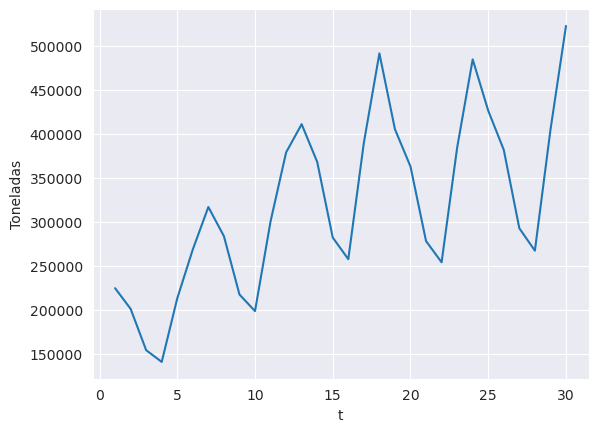

In [41]:
sns.lineplot(data=df, x='t', y='Toneladas')

Conteste las siguientes preguntas.

###  1. Si establecemos como “regla de dedo” que una serie presenta poca variación si el coeficiente de variación es menor a 30%. En el caso de las exportaciones de aguacate ¿cuánto vale el coeficiente de variación? Exprese su resultado en porcentaje con dos decimales.

In [42]:
y_bar = df['Toneladas'].mean()
s_y = df['Toneladas'].std()
cv = s_y / y_bar
print(f"Se tiene un promedio de {y_bar:,.2f} Toneladas, con una desviación estándar de: {s_y:,.2f}.")
print(f"El coeficiente de varación es {(cv * 100):.2f} %")

Se tiene un promedio de 318,674.72 Toneladas, con una desviación estándar de: 100,061.44.
El coeficiente de varación es 31.40 %


In [43]:
print("Presenta poca variación" if cv < 0.3 else "Presenta mucha variación")

Presenta mucha variación


### 2. Considerando las estadísticas descriptivas de la serie de tiempo de las exportaciones de aguacate ¿qué puede concluir? Incluya los gráficos relevantes para su análisis.

In [44]:
df['Toneladas'].describe()

count        30.000000
mean     318674.716667
std      100061.438890
min      140857.770000
25%      254873.122500
50%      296551.875000
75%      388319.302500
max      522430.980000
Name: Toneladas, dtype: float64

### 3. Considerando un modelo de regresión de la serie original contra el tiempo, el valor del coeficiente de pendiente muestral es en miles de toneladas es:

In [45]:
model_df = (
    smf.ols(
        formula='Toneladas ~ t',
        data=df
    )
    .fit()
)

In [46]:
b1 : float = model_df.params['t']
b0 : float = model_df.params['Intercept']
print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = 7,533.7778
El estimador de la eslasticidad = b0 = intercept = 201,901.1614


In [47]:
print(f"El coeficiente b1 = slope = {model_df.params['t']:,.3f}")
print(f"El coeficiente b0 = intercept = {model_df.params['Intercept']:,.3f}")

El coeficiente b1 = slope = 7,533.778
El coeficiente b0 = intercept = 201,901.161


In [48]:
print(f"El coeficiente de pendiente muestral es {model_df.params['t']:,.3f} en miles de toneladas.")

El coeficiente de pendiente muestral es 7,533.778 en miles de toneladas.


### 4. Elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si las exportaciones de aguacate han venido creciendo en el tiempo.


118 o 242. Libro 

In [49]:
se_b1 = model_df.bse['t']
t_value = (b1 - 0) / (se_b1)
print(f"{t_value}")

4.684070570283039


Obtención del estadistico t mediante el modelo.

In [50]:
model_df.tvalues['t']

4.684070570283039

Prueba de hipótesis mediante p valor.

In [51]:
p_value = 1 - t.cdf(t_value, df=model_df.df_resid)
p_value

3.2885344124267135e-05

In [52]:
if  p_value < 0.05 :
    print("Se rechaza H0")
else:
    print("Se acepta H0")

Se rechaza H0


Prueba de hipótesis mediante t crítica:

In [53]:
t_critic = t.ppf(1 - 0.05, df=model_df.df_resid)
t_critic

1.701130934265931

In [54]:
if t_value > t_critic:
    print("Se rechaza H0")
else:
    print("Se acepta H0") 

Se rechaza H0


### 5. Aplicando la técnica de desestacionalidad simple vista en clase, obtenga los índices estacionales e interprételos.

In [55]:
df.head()

,Año,Bimestre,t,Toneladas
0,2019,1,1,224604.04
1,2019,2,2,201125.90
2,2019,3,3,154184.06
3,2019,4,4,140857.77
4,2019,5,5,213070.50


Obtención del promedio anual

In [56]:
df_year = df[['Año', 'Toneladas']].groupby('Año').mean()
df_year

,Toneladas
Año,
2019,200414.411667
2020,282608.223333
2021,366555.720000
2022,361418.345000
2023,382376.883333


División del promedio anual entre el valor de las toneladas.

In [57]:
df2 = df.copy()
df2['Toneladas_anual'] = df2.apply(lambda row: row['Toneladas'] / df_year.loc[row['Año'], 'Toneladas'], axis=1)
df2


,Año,Bimestre,t,Toneladas,Toneladas_anual
0,2019,1,1,224604.04,1.120698
1,2019,2,2,201125.90,1.003550
2,2019,3,3,154184.06,0.769326
3,2019,4,4,140857.77,0.702833
4,2019,5,5,213070.50,1.063150
5,2019,6,6,268644.20,1.340444
6,2020,1,7,316793.52,1.120964
7,2020,2,8,283659.09,1.003718
8,2020,3,9,217428.69,0.769364
9,2020,4,10,198535.98,0.702513


Obtención del promedio por periodo.

In [58]:
df_bim = df2[['Bimestre','Toneladas_anual']].groupby('Bimestre').mean()
df_bim

,Toneladas_anual
Bimestre,
1,1.119533
2,1.002584
3,0.768604
4,0.701881
5,1.061903
6,1.345495


Validación del número de periodos

In [59]:
df2.groupby('Bimestre').sum().reset_index()['Toneladas_anual'].sum()

30.0

División del promedio por periodos. 

In [79]:
df2 = df.copy()
df2['Toneladas_periodo'] = df2.apply(lambda row: row['Toneladas'] / df_bim.loc[row['Bimestre'], 'Toneladas_anual'], axis=1)
df2['Indice'] = df2.apply(lambda row: df_bim.loc[row['Bimestre'], 'Toneladas_anual'], axis=1)
df2['Toneladas_periodo_pred'] = df2['Toneladas_periodo'] * df2['Indice']
df2

,Año,Bimestre,t,Toneladas,Toneladas_periodo,Indice,Toneladas_periodo_pred
0,2019,1,1,224604.04,200623.063470,1.119533,224604.04
1,2019,2,2,201125.90,200607.464279,1.002584,201125.90
2,2019,3,3,154184.06,200602.655511,0.768604,154184.06
3,2019,4,4,140857.77,200686.099233,0.701881,140857.77
4,2019,5,5,213070.50,200649.747725,1.061903,213070.50
5,2019,6,6,268644.20,199661.956083,1.345495,268644.20
6,2020,1,7,316793.52,282969.471385,1.119533,316793.52
7,2020,2,8,283659.09,282927.911147,1.002584,283659.09
8,2020,3,9,217428.69,282887.690194,0.768604,217428.69
9,2020,4,10,198535.98,282862.715941,0.701881,198535.98


### 6. Obtenga la regresión lineal simple con los datos desestacionalizados y el tiempo y elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si la tendencia de las exportaciones de aguacate ha venido creciendo en el tiempo.

In [61]:
model_df2 = (
    smf.ols(
        formula='Toneladas_periodo ~ t',
        data=df2
    )
    .fit()
)

### 7. Proporcione un intervalo al 95% de confianza para el valor de la tendencia de la serie de exportaciones de aguacate en el segundo bimestre del 2024.

In [62]:
b0_des : float = model_df2.params['t']
b1_des : float = model_df2.params['Intercept']

print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1_des:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0_des:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = 208,947.4114
El estimador de la eslasticidad = b0 = intercept = 7,078.0236


In [63]:
data = {
    'Año': [2024, 2024, 2024, 2024, 2024, 2024],
    'Bimestre': [1, 2, 3, 4, 5, 6],
    't': [31, 32, 33, 34, 35, 36]
}

df3 = pd.DataFrame(data)
# df3

In [64]:
# Modelo sin desestacionalidad
predictions = model_df.get_prediction(df3['t'])
predicted_values = predictions.predicted_mean
df3['base_model'] = predicted_values

In [81]:
# Modelo desestacionalizado
predictions = model_df2.get_prediction(df3['t'])
predicted_values = predictions.predicted_mean
df3['des_model'] = predicted_values 

In [66]:
df3

,Año,Bimestre,t,base_model,des_model
0,2024,1,31,435448.271908,428366.143716
1,2024,2,32,442982.049666,435444.167341
2,2024,3,33,450515.827423,442522.190965
3,2024,4,34,458049.605181,449600.214590
4,2024,5,35,465583.382938,456678.238214
5,2024,6,36,473117.160696,463756.261839


In [82]:
df3['Indice'] = df3.apply(lambda row: df_bim.loc[row['Bimestre'], 'Toneladas_anual'], axis=1)
df3

,Año,Bimestre,t,base_model,des_model,Indice
0,2024,1,31,435448.271908,428366.143716,1.119533
1,2024,2,32,442982.049666,435444.167341,1.002584
2,2024,3,33,450515.827423,442522.190965,0.768604
3,2024,4,34,458049.605181,449600.214590,0.701881
4,2024,5,35,465583.382938,456678.238214,1.061903
5,2024,6,36,473117.160696,463756.261839,1.345495


In [83]:
df3["new_des_model"] = df3["Indice"] * df3["des_model"]
df3

,Año,Bimestre,t,base_model,des_model,Indice,new_des_model
0,2024,1,31,435448.271908,428366.143716,1.119533,479569.820209
1,2024,2,32,442982.049666,435444.167341,1.002584,436569.498404
2,2024,3,33,450515.827423,442522.190965,0.768604,340124.450843
3,2024,4,34,458049.605181,449600.214590,0.701881,315565.870584
4,2024,5,35,465583.382938,456678.238214,1.061903,484947.834018
5,2024,6,36,473117.160696,463756.261839,1.345495,623981.816069


In [67]:
t_2024_b2 = df3[(df3['Año'] == 2024) & (df3['Bimestre'] == 2)]['t'][1]
t_2024_b2

32

Para el segúndo bimestre del 2024, el valor de t debe ser 32.

Obtención de las predicciones:

In [77]:
prediction = model_df2.get_prediction({"t": t_2024_b2})

Cálculo de intervalo de confianza.

In [69]:
model_df2.bse['t']

665.9985631191897

In [70]:
confience = 0.95
mean_ci = prediction.conf_int(alpha=1-confience)[0]
print(f"({mean_ci[0]:,.2f}, {mean_ci[1]:,.2f})")

(410,025.16, 460,863.17)


### 8. Compare los resultados de los modelos de regresión lineal simple ajustados a la serie de tiempo original y a la serie desestacionalizada, ambos contra el tiempo. ¿cuál es una explicación sólida para justificar el hecho de que el coeficiente de determinación cambie?

Resumen de la regresión estacionalizada

In [71]:
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Toneladas   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     21.94
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           6.58e-05
Time:                        11:24:04   Log-Likelihood:                -378.79
No. Observations:                  30   AIC:                             761.6
Df Residuals:                      28   BIC:                             764.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.019e+05   2.86e+04      7.071      0.000    1.43e+05     2.6e+05
t           7533.7778   1608.383      4.684      0.000    4239.155    1.08e+04
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.695
Skew:                          -0.009   Prob(JB):                        0.707
Kurtosis:                       2.255   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resumen de la regresión desestacionalizada

In [72]:
model_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Toneladas_periodo   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.47e-11
Time:                        11:24:04   Log-Likelihood:                -352.34
No. Observations:                  30   AIC:                             708.7
Df Residuals:                      28   BIC:                             711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.089e+05   1.18e+04     17.672      0.000    1.85e+05    2.33e+05
t           7078.0236    665.999     10.628      0.000    5713.787    8442.260
==============================================================================
Omnibus:                        1.705   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.567
Skew:                           0.475   Prob(JB):                        0.457
Kurtosis:                       2.409   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparando valores de R al cuadrado

In [73]:
print(f"El modelo base de regresión tiene una R2 de {model_df.rsquared:.3f}, mientras que el modelo desetacionalizado tiene una R2 de: {model_df2.rsquared:.3f}")
print(f"La diferencia es de: {(model_df.rsquared - model_df2.rsquared):.3f}")
print(f"Implicando que -> {'Modelo con estacionalidad' if model_df.rsquared > model_df2.rsquared else 'Modelo desestacionalizado'} <- tiene un mejor ajuste")


El modelo base de regresión tiene una R2 de 0.439, mientras que el modelo desetacionalizado tiene una R2 de: 0.801
La diferencia es de: -0.362
Implicando que -> Modelo desestacionalizado <- tiene un mejor ajuste


Al eliminar el ruido causado por la estacionalidad de la serie de tiempo, el modelo se vuelve más lineal, permitiendo que una línea recta se ajuste con menor error. Esto se refleja en un valor de $R^2$ superior para el modelo desestacionalizado en comparación con el modelo que conserva la estacionalidad

### 9. Grafique los pronósticos obtenidos con ambas técnicas y comente los resultados.

In [74]:
df3

,Año,Bimestre,t,base_model,des_model
0,2024,1,31,435448.271908,428366.143716
1,2024,2,32,442982.049666,435444.167341
2,2024,3,33,450515.827423,442522.190965
3,2024,4,34,458049.605181,449600.214590
4,2024,5,35,465583.382938,456678.238214
5,2024,6,36,473117.160696,463756.261839


<Axes: xlabel='t', ylabel='Toneladas'>

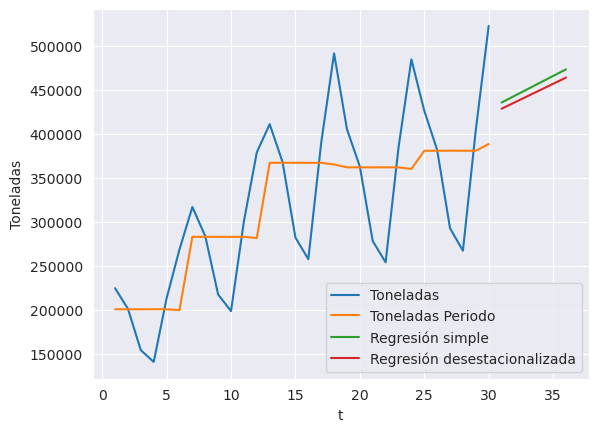

In [75]:
sns.lineplot(data=df2, x='t', y='Toneladas', label='Toneladas')
sns.lineplot(data=df2, x='t', y='Toneladas_periodo', label='Toneladas Periodo')
sns.lineplot(data=df3, x='t', y='base_model', label='Regresión simple')
sns.lineplot(data=df3, x='t', y='des_model', label='Regresión desestacionalizada')

In [86]:
data = {
    'Año': [2019, 2019, 2019, 2019, 2019, 2019, 
            2020, 2020, 2020, 2020, 2020, 2020, 
            2021, 2021, 2021, 2021, 2021, 2021, 
            2022, 2022, 2022, 2022, 2022, 2022, 
            2023, 2023, 2023, 2023, 2023, 2023,
            2024, 2024, 2024, 2024, 2024, 2024, 
            ],
    'Bimestre': [1, 2, 3, 4, 5, 6, 
                 1, 2, 3, 4, 5, 6, 
                 1, 2, 3, 4, 5, 6, 
                 1, 2, 3, 4, 5, 6, 
                 1, 2, 3, 4, 5, 6,
                 1, 2, 3, 4, 5, 6],
    't': [1, 2, 3, 4, 5, 6, 
          7, 8, 9, 10, 11, 12, 
          13, 14, 15, 16, 17, 18, 
          19, 20, 21, 22, 23, 24, 
          25, 26, 27, 28, 29, 30, 
          31, 32, 33, 34, 35, 36]
}

df5 = pd.DataFrame(data)
df5['Indice'] = df5.apply(lambda row: df_bim.loc[row['Bimestre'], 'Toneladas_anual'], axis=1)
df5.head()

,Año,Bimestre,t,Indice
0,2019,1,1,1.119533
1,2019,2,2,1.002584
2,2019,3,3,0.768604
3,2019,4,4,0.701881
4,2019,5,5,1.061903


In [87]:
predictions = model_df2.get_prediction(df5['t'])
predicted_values = predictions.predicted_mean
df5['des_model'] = predicted_values 

In [89]:
df5["full_pred"] = df5["Indice"] * df5["des_model"]
df5

,Año,Bimestre,t,Indice,des_model,full_pred
0,2019,1,1,1.119533,216025.434980,241847.495498
1,2019,2,2,1.002584,223103.458604,223680.031380
2,2019,3,3,0.768604,230181.482229,176918.472871
3,2019,4,4,0.701881,237259.505854,166527.951032
4,2019,5,5,1.061903,244337.529478,259462.671471
5,2019,6,6,1.345495,251415.553103,338278.415457
6,2020,1,7,1.119533,258493.576727,289391.960440
7,2020,2,8,1.002584,265571.600352,266257.924785
8,2020,3,9,0.768604,272649.623976,209559.668466
9,2020,4,10,0.701881,279727.647601,196335.534942


In [93]:
df_pred = pd.merge(df, df5, on="t")
df_pred = df_pred[['Año_x', 'Bimestre_x', 't', 'Toneladas', 'full_pred']]
df_pred

,Año_x,Bimestre_x,t,Toneladas,full_pred
0,2019,1,1,224604.04,241847.495498
1,2019,2,2,201125.90,223680.031380
2,2019,3,3,154184.06,176918.472871
3,2019,4,4,140857.77,166527.951032
4,2019,5,5,213070.50,259462.671471
5,2019,6,6,268644.20,338278.415457
6,2020,1,7,316793.52,289391.960440
7,2020,2,8,283659.09,266257.924785
8,2020,3,9,217428.69,209559.668466
9,2020,4,10,198535.98,196335.534942


<Axes: xlabel='t', ylabel='Toneladas'>

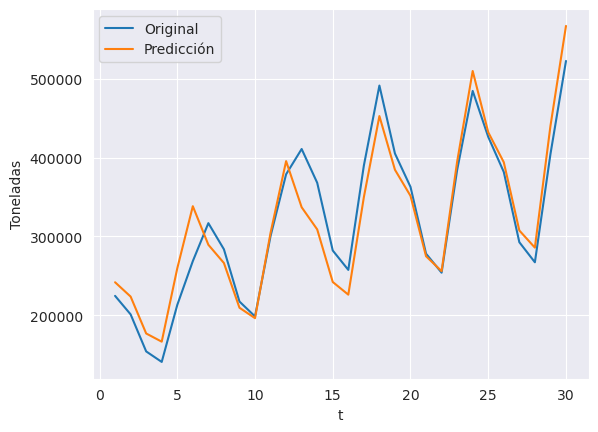

In [94]:
sns.lineplot(data=df_pred, x='t', y='Toneladas', label='Original')
sns.lineplot(data=df_pred, x='t', y='full_pred', label='Predicción')